In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

# Apply the Random Forests algorithm but this time only by upscaling the data.

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)

In [3]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [4]:
numerical.dtypes

TCODE         int64
AGE         float64
INCOME        int64
WEALTH1       int64
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2      int64
Length: 315, dtype: object

In [5]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [6]:
# Check for NaN/Null values
print(data.isna().sum().sum())
print(data.isnull().sum().sum())

0
0


In [7]:
data.shape

(95412, 339)

In [8]:
data.dtypes

TCODE             int64
AGE             float64
INCOME            int64
WEALTH1           int64
HIT               int64
                 ...   
LASTDATE_MM       int64
FIRSTDATE_YR      int64
FIRSTDATE_MM      int64
TARGET_B          int64
TARGET_D        float64
Length: 339, dtype: object

In [9]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

In [10]:
# OneHotEncoding of the categoricals for future linear regression
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51

In [11]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

# Creating categories:
category_0 = trainset[trainset['TARGET_B']==0]
category_1 = trainset[trainset['TARGET_B']==1]

print(category_0.shape)
print(category_1.shape)

(72486, 356)
(3843, 356)


In [13]:
# Upsampling Category 1
from sklearn.utils import resample
category_1_upsampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))
print(category_1_upsampled.shape)

(72486, 356)


In [14]:
trainset_new = pd.concat([category_0, category_1_upsampled], axis = 0)

# after the concat, all the rows with target 0 are on top and with 1 at the bottom --> need to randomize the data
trainset_new = trainset_new.sample(frac =1)

# NEw X_train and y_train sets
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']

print(X_train.shape)

(144972, 355)


In [15]:
type(X_train)

pandas.core.frame.DataFrame

In [16]:
type(X_test)

pandas.core.frame.DataFrame

In [17]:
y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Let's remove now the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 22)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6155464503490329
0.5993816485877482


C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [19]:
y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10887,  7196],
       [  449,   551]], dtype=int64)

These were the resuts for the Random Forest calculation with Downsamplig of the category_0
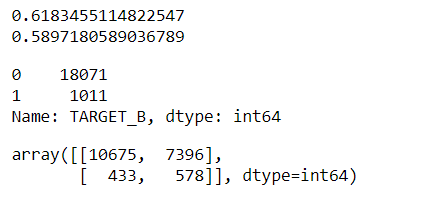

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred))

precision:  0.0711243061830386
recall:  0.551
f1:  0.12598605236080943


### Discuss the output and its impact in the bussiness scenario.

We can see that the results are quite similar for both up and down sampling. The accuracy scores are almost equal on the train and test sets for both calculations, at 60% of correct predictions.

This could seem like an interesting result, but based on the calculations in this lab, for example, our precision score would be 7.2% (550 True donors/7618 predicted donors), meaning only 7,2% of the prospect we would contact would actually donate. That does not sound like much...

We would also only have a recall score of 55% (550 true detected donors / 1 000 total of actual donors). There is room for improvement.

Both up and downsampling show exactly the same precision at 7.2% and downsampling has a slightly better recall score at 57%. But that is probably within the margin of error linked to the randomization of the train/test split.

###  Is the cost of a false positive equals to the cost of the false negative?

A false positive, is a customer to whom we would send the mailing but would not answer. The costs is thus only linked to the operating costs of the mailing (employees labor + postal/emailing costs).

A false negative, however costs nothing, as we do not send him anything (except the costs of the time spent on data analysis, of course, but which also happens for false positive). As we do not contact him, he will not donate when he would have if he had received a mailing (in average 15.62, as we saw earlier in the week). The "cost" is thus a lack of income and is higher than the one of a false positive.

That is why we should prioritize the optimization of the recall rate, to try and identify/contact as many of the actual donors as possible.

### How would you change your algorithm or data in order to maximize the return of the business?

To improve our result, we need to remove useless information : columns with no added value, redundant infos...
From this "optimized" dataset, we will then redo the up/down sampling and apply the random forest model.

In [21]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [22]:
# We will reset our base X data set
X_to_clean = data.drop(['TARGET_B', 'TARGET_D'], axis = 1)
X_to_clean.shape

(95412, 337)

In [23]:
X_train_to_clean, X_test_to_clean, y_train_2, y_test_2 = train_test_split(X_to_clean, y, test_size=0.2, random_state=22)

X_train_to_clean_num = X_train_to_clean.select_dtypes(np.number)
X_test_to_clean_num = X_test_to_clean.select_dtypes(np.number)
X_train_to_clean_cat = X_train_to_clean.select_dtypes(object)
X_test_to_clean_cat = X_test_to_clean.select_dtypes(object)

print(X_train_to_clean_num.shape)
print(X_train_to_clean_cat.shape)

(76329, 330)
(76329, 7)


##### 1. We can remove the numerical columns with a very low variance.

In [24]:
# For this, we need to scale our numerical first.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_to_clean_scaled = scaler.fit_transform(X_train_to_clean_num)
X_test_to_clean_scaled = scaler.transform(X_test_to_clean_num)

In [25]:
X_train_to_clean_scaled.shape

(76329, 330)

In [26]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02   # arbitrarily decided. Higher number will eliminate more columns. 0.02 seems reasonable
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_train_to_clean_scaled)
temp = sel.transform(X_train_to_clean_scaled)
temp = pd.DataFrame(temp)
print(temp.shape)

(76329, 90)


In [27]:
# This process would thus already allow me to drop 241 (331-90) columns
# Let's  look at what columns they are.

In [28]:
var_list = list(sel.get_support())
cols_to_drop = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]
cols_to_drop

['TCODE',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'DMA',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC1

In [29]:
X_train_scaled_and_cleaned = pd.DataFrame(X_train_to_clean_scaled, columns=X_train_to_clean_num.columns).drop(cols_to_drop, axis=1).reset_index(drop=True)
X_test_scaled_and_cleaned = pd.DataFrame(X_test_to_clean_scaled, columns=X_test_to_clean_num.columns).drop(cols_to_drop, axis=1).reset_index(drop=True)

print(X_train_scaled_and_cleaned.shape)
print(X_test_scaled_and_cleaned.shape)

(76329, 94)
(19083, 94)


Encoding the categoricals

In [30]:
X_train_to_clean_cat.head()

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
45205,MO,H,M,L,F,B,T
86960,CA,H,F,L,F,B,T
84207,other,H,F,L,E,A,S
85795,CA,H,M,L,F,A,U
15792,IL,H,F,L,E,B,R


In [31]:
ohe = OneHotEncoder(drop='first').fit(X_train_to_clean_cat)
X_train_cat_ohe = ohe.transform(X_train_to_clean_cat).toarray()
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe)

In [32]:
X_test_cat_ohe = ohe.transform(X_test_to_clean_cat).toarray()
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe)

In [33]:
X_train_cleaned = pd.concat([X_train_scaled_and_cleaned.reset_index(drop=True), X_train_cat_ohe.reset_index(drop=True)], axis = 1)
X_train_cleaned.shape

(76329, 118)

In [34]:
X_test_cleaned = pd.concat([X_test_scaled_and_cleaned.reset_index(drop=True), X_test_cat_ohe.reset_index(drop=True)], axis = 1)
X_test_cleaned.shape

(19083, 118)

We can now retrain our model and see if we get better results.

In [35]:
# for upsampling we need to temporarily concat X_train and y_train
trainset_cleaned = pd.concat([X_train_cleaned, pd.DataFrame(y_train_2).reset_index(drop=True)], axis=1)

print(trainset_cleaned.shape)
trainset_cleaned.isna().sum().sum()

(76329, 119)


0

In [36]:
# Creating categories:
category_0_cleaned = trainset_cleaned[trainset_cleaned['TARGET_B']==0]
category_1_cleaned = trainset_cleaned[trainset_cleaned['TARGET_B']==1]

print(category_0_cleaned.shape)
print(category_1_cleaned.shape)

(72477, 119)
(3852, 119)


In [37]:
category_1_cleaned_upsampled = resample(category_1_cleaned, 
                                  replace=True, 
                                  n_samples = len(category_0_cleaned))
print(category_1_cleaned_upsampled.shape)

(72477, 119)


In [38]:
trainset_new_cleaned = pd.concat([category_0_cleaned, category_1_cleaned_upsampled], axis = 0)
print(trainset_new_cleaned.shape)
trainset_new_cleaned.isna().sum().sum()

(144954, 119)


0

In [39]:
# after the concat, all the rows with target 0 are on top and with 1 at the bottom --> need to randomize the data
trainset_new_cleaned = trainset_new_cleaned.sample(frac =1)

# New X_train and y_train sets
X_train_cleaned = trainset_new_cleaned.drop(['TARGET_B'], axis=1)
y_train_cleaned = trainset_new_cleaned['TARGET_B']

In [40]:
clf_2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 22)
clf_2.fit(X_train_cleaned, y_train_cleaned)
print(clf_2.score(X_train_cleaned, y_train_cleaned))
print(clf_2.score(X_test_cleaned, y_test_2))

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6196448528498696
0.6134779646806058


C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
y_pred_2 = clf_2.predict(X_test_cleaned)
display(confusion_matrix(y_test_2, y_pred_2))

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[11164,  6928],
       [  448,   543]], dtype=int64)

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test_2,y_pred_2))
print("recall: ",recall_score(y_test_2,y_pred_2))
print("f1: ",f1_score(y_test_2,y_pred_2))

precision:  0.07268103332887163
recall:  0.5479313824419778
f1:  0.1283384542661309


Raaaaah, my recall score almost did not improve...   :-(

## Let's try to apply a layer of PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled_and_cleaned)
pca.explained_variance_ratio_.round(2)

array([0.21, 0.11, 0.07, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

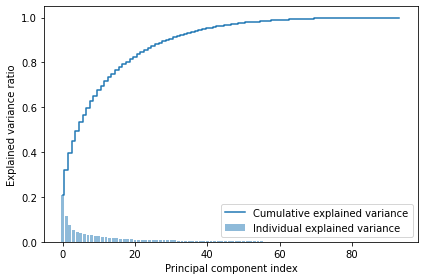

In [44]:
import matplotlib.pyplot as plt
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

cum_sum_variance = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [45]:
pca.explained_variance_ratio_[:40].sum()

0.9487266934410091

In [46]:
pca.explained_variance_ratio_[:30].sum()

0.9005650183838877

In [47]:
pca.explained_variance_ratio_[:20].sum()

0.8164085888486031

30 dimensions might be the good compromise. I'll try with this

In [48]:
pca = PCA(30)
pca.fit(X_train_scaled_and_cleaned)
X_train_num_pca = pca.transform(X_train_scaled_and_cleaned)
X_test_num_pca = pca.transform(X_test_scaled_and_cleaned)

In [49]:
print(X_train_num_pca.shape)
print(X_test_num_pca.shape)

(76329, 30)
(19083, 30)


In [50]:
print(X_train_cat_ohe.shape)
print(X_test_cat_ohe.shape)

(76329, 24)
(19083, 24)


We have to retrain our model again.

In [51]:
X_train_pca = pd.concat([pd.DataFrame(X_train_num_pca).reset_index(drop=True), X_train_cat_ohe.reset_index(drop=True)], axis=1)
X_test_pca = pd.concat([pd.DataFrame(X_test_num_pca).reset_index(drop=True), X_test_cat_ohe.reset_index(drop=True)], axis=1)

# for upsampling we need to temporarily concat X_train and y_train
trainset_pca = pd.concat([pd.DataFrame(X_train_pca).reset_index(drop=True), pd.DataFrame(y_train_2).reset_index(drop=True)], axis=1)
trainset_pca.isna().sum().sum()

0

In [52]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(trainset_pca.shape)

(76329, 54)
(19083, 54)
(76329, 55)


In [53]:
# Creating categories:
category_0_pca= trainset_pca[trainset_pca['TARGET_B']==0]
category_1_pca = trainset_pca[trainset_pca['TARGET_B']==1]

print(category_0_pca.shape)
print(category_1_pca.shape)

(72477, 55)
(3852, 55)


In [54]:
category_1_pca_upsampled = resample(category_1_pca, 
                                  replace=True, 
                                  n_samples = len(category_0_pca))
print(category_1_pca_upsampled.shape)

(72477, 55)


In [55]:
trainset_new_pca = pd.concat([category_0_pca, category_1_pca_upsampled], axis = 0)
print(trainset_new_pca.shape)
trainset_new_pca.isna().sum().sum()

(144954, 55)


0

In [56]:
# after the concat, all the rows with target 0 are on top and with 1 at the bottom --> need to randomize the data
trainset_new_pca = trainset_new_pca.sample(frac =1)

# New X_train and y_train sets
X_train_pca = trainset_new_pca.drop(['TARGET_B'], axis=1)
y_train_pca = trainset_new_pca['TARGET_B']

In [57]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(144954, 54)
(19083, 54)


In [58]:
clf_pca = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 22)
clf_pca.fit(X_train_pca, y_train_pca)
print(clf_pca.score(X_train_pca, y_train_pca))
print(clf_pca.score(X_test_pca, y_test_2))

0.6135739613946494
0.6349106534611958


In [59]:
y_pred_pca = clf_pca.predict(X_test_pca)
display(confusion_matrix(y_test_2, y_pred_pca))

array([[11618,  6474],
       [  493,   498]], dtype=int64)

In [60]:
print("precision: ",precision_score(y_test_2,y_pred_pca))
print("recall: ",recall_score(y_test_2,y_pred_pca))
print("f1: ",f1_score(y_test_2,y_pred_pca))

precision:  0.07142857142857142
recall:  0.5025227043390514
f1:  0.12507848800703253


My recall score is now even worse... I'll stick to the previous step (just removing) columns with a low variance, for the next lab (7_8)

#### Select customers fro whom we predict a donation

In [61]:
y_pred_train = clf_2.predict(X_train_cleaned)
y_pred_test = clf_2.predict(X_test_cleaned)

C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ebour\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
y_pred_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [63]:
y_pred_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [64]:
# Reunite features and prediction
train_set_predicted = X_train_cleaned
train_set_predicted['prediction'] = y_pred_train

test_set_predicted = X_test_cleaned
test_set_predicted['prediction'] = y_pred_test

In [66]:
# reunite both train and test sets
data_predicted = pd.concat([train_set_predicted, test_set_predicted], axis=0)
data_predicted.shape

(164037, 119)

In [67]:
data_predicted.to_csv('data_predicted.csv')